# Practicing Python: A (quick) Tutorial of Typical Workflow

In this tutorial, you will learn how to read data in, filter out bad data, clean up the data set, and look at particularly interesting points. We will work with a dataset that is in the form of a comma delimited value file. The data are photometric magnitudes of an Active Galactic Nuclei 'PKS 1510-089' in the B and J bands, taken on the SMARTS 1.3-m telescope in CTIO. 

The emphasis in this tutorial will be to use already existing python modules to do the heavy lifting for you. This will make you a slick, efficent, pythonista, save you a lot of 'human time' in the long run, and make your code easier for your collaborators (and your future self) to understand and use.

##Reading Data Files and Handling Bad Data

In [25]:
#lets import a few useful modules
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
#lets load up our data in an astropy ascii table and take a look at it
print ascii.read('1510-089.csv')

      JD       Bmag   Berr  Jmag   Jerr
------------- ------ ----- ------ -----
2454501.81755   null  null 14.883 0.021
2454537.77108   null  null 14.302 0.016
2454603.70459  17.24 0.011 14.646 0.024
2454640.56042 17.262 0.006  15.22  0.03
2454662.63167  17.09 0.011 14.895 0.026
2454677.63073 17.223 0.021   null  null
2454682.59854 17.329 0.022   null  null
2454685.58869 17.319 0.025   null  null
 2454689.5953 17.384  0.12   null  null
2454698.57538 17.289 0.029 15.561 0.024
2454700.49023 17.277 0.021 15.431 0.023
          ...    ...   ...    ...   ...
2457158.63753 15.573 0.004 13.127 0.006
2457164.56343 15.675 0.005 13.116 0.008
2457165.56934  15.49 0.007 12.896  0.01
2457135.72939 15.874 0.004 13.157 0.006
2457158.63753 15.573 0.004 13.127 0.006
2457164.56343 15.675 0.005 13.116 0.008
2457165.56934  15.49 0.007 12.896  0.01
2457135.72939 15.874 0.004 13.157 0.006
2457158.63753 15.573 0.004 13.127 0.006
2457164.56343 15.675 0.005 13.116 0.008
2457165.56934  15.49 0.007 12.896  0.01


In [27]:
#as you can see, our data has bad values in it marked 'null'
#that's not very usefull to us-'null' is a string and the rest of the data are floats
#Lets convert the nulls to NaNs instead
#python can operate on the table and intelligently ignore NaN
Table=ascii.read('1510-089.csv', fill_values=[('null',np.nan)])
print Table

      JD       Bmag   Berr  Jmag   Jerr
------------- ------ ----- ------ -----
2454501.81755     --    -- 14.883 0.021
2454537.77108     --    -- 14.302 0.016
2454603.70459  17.24 0.011 14.646 0.024
2454640.56042 17.262 0.006  15.22  0.03
2454662.63167  17.09 0.011 14.895 0.026
2454677.63073 17.223 0.021     --    --
2454682.59854 17.329 0.022     --    --
2454685.58869 17.319 0.025     --    --
 2454689.5953 17.384  0.12     --    --
2454698.57538 17.289 0.029 15.561 0.024
2454700.49023 17.277 0.021 15.431 0.023
          ...    ...   ...    ...   ...
2457158.63753 15.573 0.004 13.127 0.006
2457164.56343 15.675 0.005 13.116 0.008
2457165.56934  15.49 0.007 12.896  0.01
2457135.72939 15.874 0.004 13.157 0.006
2457158.63753 15.573 0.004 13.127 0.006
2457164.56343 15.675 0.005 13.116 0.008
2457165.56934  15.49 0.007 12.896  0.01
2457135.72939 15.874 0.004 13.157 0.006
2457158.63753 15.573 0.004 13.127 0.006
2457164.56343 15.675 0.005 13.116 0.008
2457165.56934  15.49 0.007 12.896  0.01


##Understanding Astropy Tables

In [28]:
#looking better. The dashes have replaced the null values
#astropy ascii has done something very helpful behind the scenes, it has masked the bad data
#lets have a closer look. We can access a colum of data like this
Table['Bmag']

<MaskedColumn name='Bmag' unit=None format=None description=None>
masked_array(data = [-- -- 17.24 17.262 17.09 17.223 17.329 17.319 17.384 17.289 17.277 17.267
 17.234 17.127 17.187 17.181 17.086 17.161 17.244 17.287 -- -- 16.915 --
 16.779 -- 17.295 17.232 -- -- 17.253 -- -- -- -- -- -- 17.158 17.21 -- --
 16.951 16.841 16.864 16.532 16.773 16.533 15.254 16.299 15.736 16.22
 16.346 16.393 16.377 16.222 15.967 15.662 16.067 15.706 15.68 15.625 15.72
 15.707 15.699 15.976 16.249 16.224 16.171 16.403 16.343 16.474 16.552
 16.506 16.265 16.376 16.476 16.505 16.576 16.443 16.506 16.529 16.548 16.5
 16.481 15.774 14.04 14.653 15.882 16.452 16.625 16.573 16.473 16.649 16.68
 16.627 16.575 16.489 16.567 16.485 16.31 16.327 16.044 16.101 16.547
 16.641 16.633 16.575 16.626 16.664 16.647 16.61 16.625 16.38 16.496 16.795
 16.951 16.869 16.836 16.731 16.669 16.79 16.825 16.811 16.792 -- 16.84
 16.861 16.884 16.881 16.849 16.838 16.834 16.774 16.82 16.839 16.839
 16.835 16.841 16.783 16.773 16.76

In [29]:
#you can also iterate through the rows of this table, the same way you would slice an array or list.
Table[0:10]

JD,Bmag,Berr,Jmag,Jerr
2454501.81755,--,--,14.883,0.021
2454537.77108,--,--,14.302,0.016
2454603.70459,17.24,0.011,14.646,0.024
2454640.56042,17.262,0.006,15.22,0.03
2454662.63167,17.09,0.011,14.895,0.026
2454677.63073,17.223,0.021,--,--
2454682.59854,17.329,0.022,--,--
2454685.58869,17.319,0.025,--,--
2454689.5953,17.384,0.12,--,--
2454698.57538,17.289,0.029,15.561,0.024


In [30]:
#or select certain rows from certain columns
Table['JD','Bmag'][50:65]

JD,Bmag
2454918.74582,16.22
2454919.63389,16.346
2454920.63069,16.393
2454921.82591,16.377
2454922.73373,16.222
2454926.68903,15.967
2454927.79263,15.662
2454928.77692,16.067
2454929.73002,15.706
2454930.84991,15.68


##Visualizing and Cleaning Data

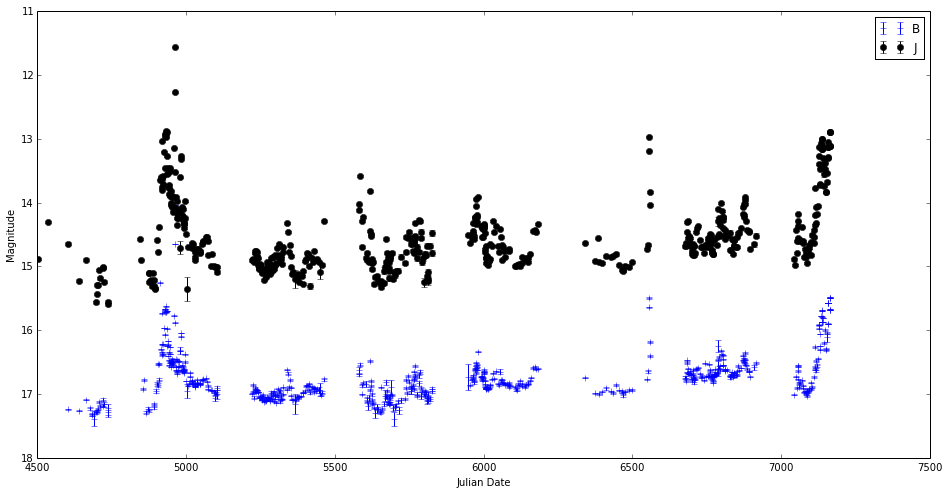

In [37]:
#OK now lets make a quick light curve so we can look at the data

#first we create our 'canvas' on which we will create our plot
fig=plt.figure(figsize=(16,8))

#then we attatch a plot to it
ax=fig.add_subplot(111)

#now we create error bar plots
ax.errorbar(Table['JD']-2450000,Table['Bmag'],yerr=Table['Berr'], fmt='b+', label='B')
ax.errorbar(Table['JD']-2450000,Table['Jmag'],yerr=Table['Jerr'], fmt='ko', label='J')

ax.set_ylabel('Magnitude')
ax.set_xlabel('Julian Date')
#magnitudes run backwards
ax.invert_yaxis()

#make sure our legend renders
plt.legend()
#display the plot
plt.show()

In [35]:
#there's a weirdo point in the B band. 
#for the sake of argument, lets say it is a bad data point that made it through
#lets turn it into a NaN, and see how to select specific data in our table
Table['Bmag'][Table['JD'] > 2457000].min()

15.329000000000001

In [36]:
Table['Bmag'][Table['Bmag']==15.329000000000001]=np.nan

In [38]:
#Lets compute the color excess for every observation date, and save this data as another column
#we can do this very painlessly thanks to astropy table's handy-ness
Table['color']=Table['Bmag']-Table['Jmag']


In [39]:
Table

JD,Bmag,Berr,Jmag,Jerr,color
2454501.81755,--,--,14.883,0.021,--
2454537.77108,--,--,14.302,0.016,--
2454603.70459,17.24,0.011,14.646,0.024,2.594
2454640.56042,17.262,0.006,15.22,0.03,2.042
2454662.63167,17.09,0.011,14.895,0.026,2.195
2454677.63073,17.223,0.021,--,--,--
2454682.59854,17.329,0.022,--,--,--
2454685.58869,17.319,0.025,--,--,--
2454689.5953,17.384,0.12,--,--,--
2454698.57538,17.289,0.029,15.561,0.024,1.728


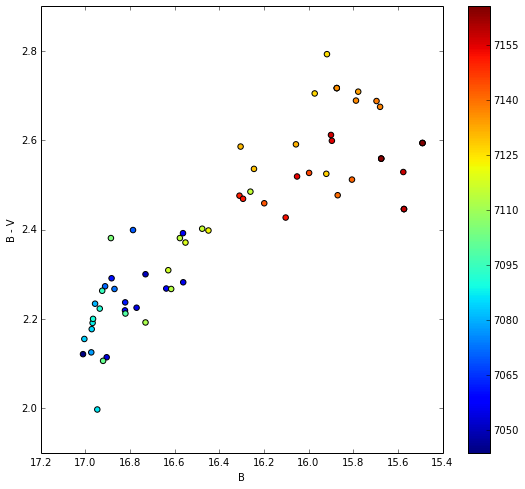

In [40]:
#now lets see how the color excess changed for data from the most recent flare

#first we create our 'canvas' on which we will create our plot
fig=plt.figure(figsize=(9,8))

#then we attatch a plot to it
ax=fig.add_subplot(111)

#create a slice of the data table for the dates we are interested in
TableSlice=Table[Table['JD'] > 2457000]

#now we create a scatter plot, using the dates to specify the colors of the point
#we assign it to the variable 'plot' so we can attatch a color bar to it later
plot=ax.scatter(TableSlice['Bmag'],TableSlice['color'], c=TableSlice['JD']-2450000, s=30)

ax.set_ylabel('B - V')
ax.set_xlabel('B')

#magnitudes run backwards
ax.invert_xaxis()

#make sure our color bar renders
plt.colorbar(plot)

#display the plot
plt.show()